In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Fetch environment variables
DB_HOST = os.getenv("DB_HOST")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")

# Create a connection using SQLAlchemy with environment variables
db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:5432/{DB_NAME}"
engine = create_engine(db_url)

# Test the connection by counting rows in block_stats
query = "SELECT COUNT(*) FROM block_stats"
block_count = pd.read_sql(query, engine)
print(f"Total blocks in block_stats: {block_count.iloc[0, 0]}")

Total blocks in block_stats: 106589


In [25]:
import pandas as pd
from sqlalchemy import create_engine

# Create a connection using SQLAlchemy with environment variables
db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:5432/{DB_NAME}"
engine = create_engine(db_url)

# Query block data
query = """
    SELECT block_height, total_fee, txs, timestamp
    FROM block_stats
    ORDER BY block_height ASC
    LIMIT 10000;
"""

# Load the data into a pandas DataFrame
block_data = pd.read_sql(query, engine)

# Convert the timestamp to a datetime object
block_data['timestamp'] = pd.to_datetime(block_data['timestamp'], unit='s')

# Display the first few rows of the dataframe
block_data.head()

,block_height,total_fee,txs,timestamp
0,0,0,1,2009-01-03 11:15:05
1,1,0,1,2009-01-08 19:54:25
2,2,0,1,2009-01-08 19:55:44
3,3,0,1,2009-01-08 20:02:53
4,4,0,1,2009-01-08 20:16:28


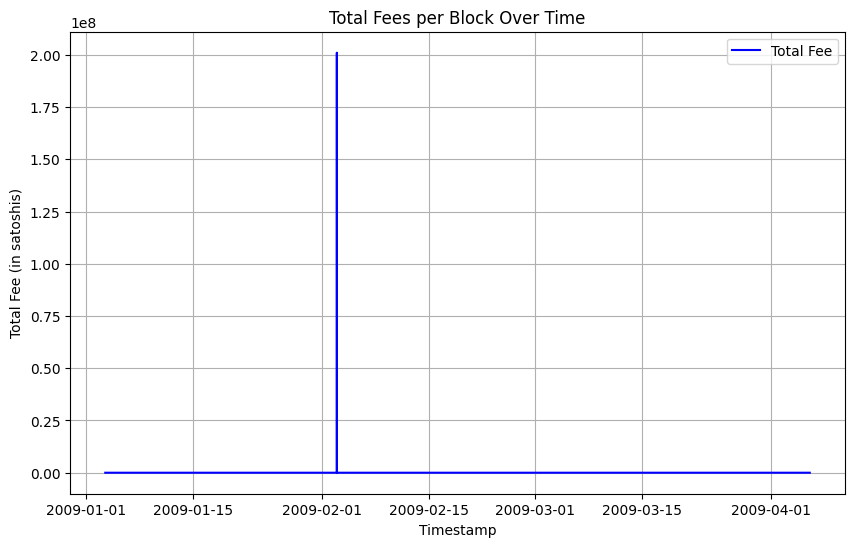

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(block_data['timestamp'], block_data['total_fee'], color='b', label='Total Fee')
plt.xlabel('Timestamp')
plt.ylabel('Total Fee (in satoshis)')
plt.title('Total Fees per Block Over Time')
plt.legend()
plt.grid(True)
plt.show()

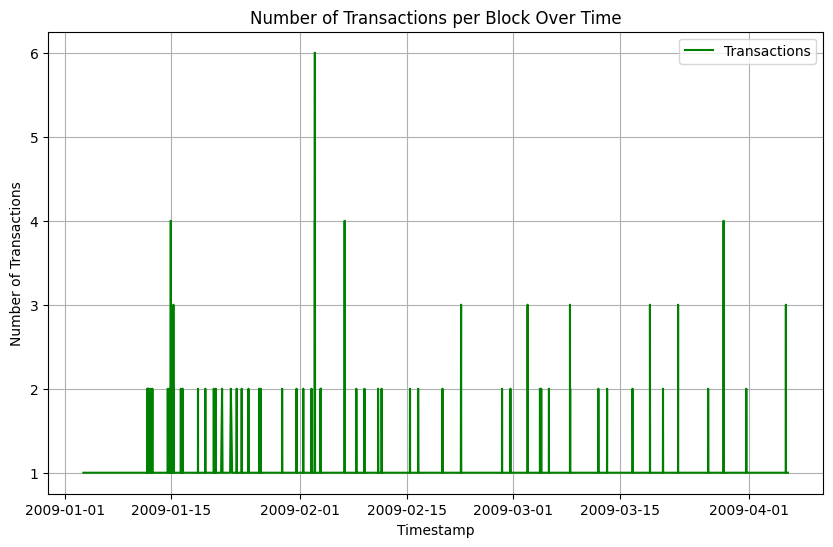

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(block_data['timestamp'], block_data['txs'], color='g', label='Transactions')
plt.xlabel('Timestamp')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Block Over Time')
plt.legend()
plt.grid(True)
plt.show()


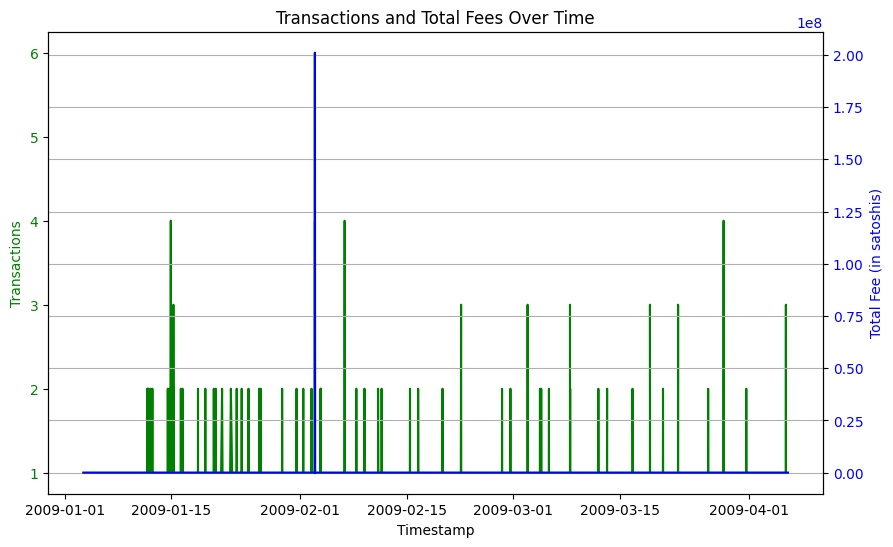

In [28]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot transactions on the left y-axis
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Transactions', color='g')
ax1.plot(block_data['timestamp'], block_data['txs'], color='g', label='Transactions')
ax1.tick_params(axis='y', labelcolor='g')

# Create another y-axis for the total fees
ax2 = ax1.twinx()
ax2.set_ylabel('Total Fee (in satoshis)', color='b')
ax2.plot(block_data['timestamp'], block_data['total_fee'], color='b', label='Total Fee')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Transactions and Total Fees Over Time')
plt.grid(True)
plt.show()


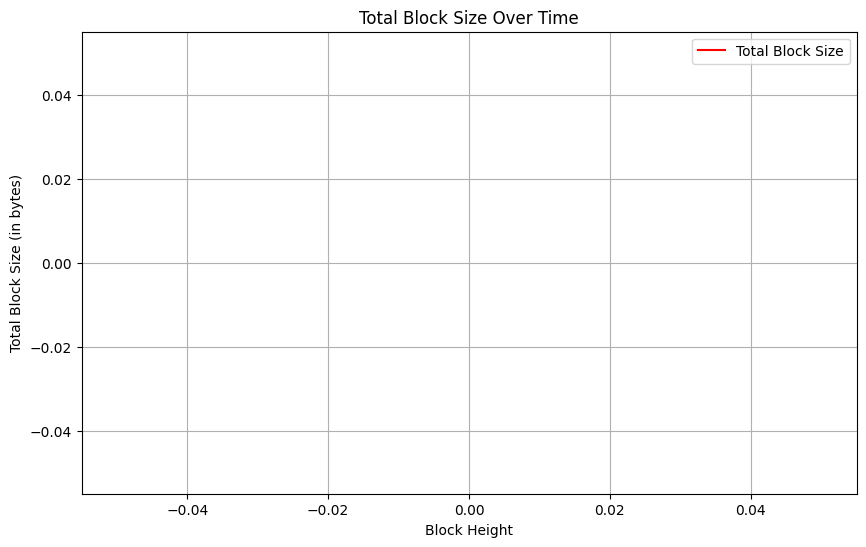

In [29]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Create a connection using SQLAlchemy with environment variables
db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:5432/{DB_NAME}"
engine = create_engine(db_url)

# Query more detailed block statistics
query = """
    SELECT block_height, total_size, total_weight, swtxs
    FROM block_stats
    ORDER BY block_height ASC
    LIMIT 1000;
"""

# Load the data into a pandas DataFrame using SQLAlchemy engine
block_stats = pd.read_sql(query, engine)

# Plot total block size over time
plt.figure(figsize=(10, 6))
plt.plot(block_stats['block_height'], block_stats['total_size'], color='r', label='Total Block Size')
plt.xlabel('Block Height')
plt.ylabel('Total Block Size (in bytes)')
plt.title('Total Block Size Over Time')
plt.legend()
plt.grid(True)
plt.show()
